In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   2   3   4   5   7   9  11  13  16  19  20  22  23  24  25  26  27
  28  29  30  32  33  35  36  38  39  41  42  43  44  46  47  51  53  54
  56  57  58  59  60  61  63  65  67  68  69  70  71  72  73  74  80  81
  82  83  84  86  87  88  89  90  91  93  94  95  96  97  98  99 100 102
 104 105 106 107 108 109 110 111 112 114 115 116 117 118 119 120 121 123
 124 125 126 128 129 130 131 132 133 134 135 136 137 138 139 141 143 145
 146 147 148 149 150 151 152 153 154 156 158 160 161 163 164 166 167 168
 169 171 172 173 174 176 177 178 179 180 181 182 183 184 185 186 188 189
 190 191 192 195 197 198 199 201 203 204 207 208 209 211 212 213 214 215
 216 217 218 219 220 221 223 224 225 226 227 228 231 232 234 235 237 238
 239 240 241 243 244 246 248 253 254 255 256 257 258 259 260 262 264 265
 267 269 270 273 274 275 276 277 279 280 281 282 283 284 286 287 288 289
 290 291 292 295 296 297 298 299 300 302 304 305 307 308 309 310 311 313
 314 315 319 320 321 322 323 324 325 326 328

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 60,
                      reg_lambda = .6,
                      max_depth=5, 
                      max_delta_step=3,
                      gamma=5,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[02:19:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.08114	validation_0-mlogloss:1.09661	validation_1-merror:0.09146	validation_1-mlogloss:1.09667
[1]	validation_0-merror:0.08114	validation_0-mlogloss:1.09388	validation_1-merror:0.09146	validation_1-mlogloss:1.09399
[2]	validation_0-merror:0.08114	validation_0-mlogloss:1.09196	validation_1-merror:0.09146	validation_1-mlogloss:1.09213
[3]	validation_0-merror:0.08114	validation_0-mlogloss:1.08922	validation_1-merror:0.09146	validation_1-mlogloss:1.08944
[4]	validation_0-merror:0.08114	validation_0-mlogloss:1.08652	validation_1-merror:0.09146	validation_1-mlogloss:1.08680
[5]	validation_0-merror:0.08114	validation_

[65]	validation_0-merror:0.08114	validation_0-mlogloss:0.96057	validation_1-merror:0.09146	validation_1-mlogloss:0.96390
[66]	validation_0-merror:0.08114	validation_0-mlogloss:0.95866	validation_1-merror:0.09146	validation_1-mlogloss:0.96203
[67]	validation_0-merror:0.08114	validation_0-mlogloss:0.95728	validation_1-merror:0.09146	validation_1-mlogloss:0.96068
[68]	validation_0-merror:0.08114	validation_0-mlogloss:0.95593	validation_1-merror:0.09146	validation_1-mlogloss:0.95940
[69]	validation_0-merror:0.08114	validation_0-mlogloss:0.95402	validation_1-merror:0.09146	validation_1-mlogloss:0.95752
[70]	validation_0-merror:0.08114	validation_0-mlogloss:0.95206	validation_1-merror:0.09146	validation_1-mlogloss:0.95560
[71]	validation_0-merror:0.08114	validation_0-mlogloss:0.95016	validation_1-merror:0.09146	validation_1-mlogloss:0.95373
[72]	validation_0-merror:0.08114	validation_0-mlogloss:0.94878	validation_1-merror:0.09146	validation_1-mlogloss:0.95241
[73]	validation_0-merror:0.08114

[133]	validation_0-merror:0.08114	validation_0-mlogloss:0.86322	validation_1-merror:0.09146	validation_1-mlogloss:0.86886
[134]	validation_0-merror:0.08114	validation_0-mlogloss:0.86220	validation_1-merror:0.09146	validation_1-mlogloss:0.86789
[135]	validation_0-merror:0.08114	validation_0-mlogloss:0.86169	validation_1-merror:0.09146	validation_1-mlogloss:0.86744
[136]	validation_0-merror:0.08114	validation_0-mlogloss:0.86071	validation_1-merror:0.09146	validation_1-mlogloss:0.86651
[137]	validation_0-merror:0.08114	validation_0-mlogloss:0.85931	validation_1-merror:0.09146	validation_1-mlogloss:0.86512
[138]	validation_0-merror:0.08114	validation_0-mlogloss:0.85793	validation_1-merror:0.09146	validation_1-mlogloss:0.86377
[139]	validation_0-merror:0.08114	validation_0-mlogloss:0.85740	validation_1-merror:0.09146	validation_1-mlogloss:0.86330
[140]	validation_0-merror:0.08114	validation_0-mlogloss:0.85598	validation_1-merror:0.09146	validation_1-mlogloss:0.86190
[141]	validation_0-merro

[201]	validation_0-merror:0.08114	validation_0-mlogloss:0.79322	validation_1-merror:0.09146	validation_1-mlogloss:0.80058
[202]	validation_0-merror:0.08114	validation_0-mlogloss:0.79258	validation_1-merror:0.09146	validation_1-mlogloss:0.79997
[203]	validation_0-merror:0.08114	validation_0-mlogloss:0.79156	validation_1-merror:0.09146	validation_1-mlogloss:0.79896
[204]	validation_0-merror:0.08114	validation_0-mlogloss:0.79054	validation_1-merror:0.09146	validation_1-mlogloss:0.79795
[205]	validation_0-merror:0.08114	validation_0-mlogloss:0.78947	validation_1-merror:0.09146	validation_1-mlogloss:0.79690
[206]	validation_0-merror:0.08114	validation_0-mlogloss:0.78834	validation_1-merror:0.09146	validation_1-mlogloss:0.79578
[207]	validation_0-merror:0.08114	validation_0-mlogloss:0.78731	validation_1-merror:0.09146	validation_1-mlogloss:0.79477
[208]	validation_0-merror:0.08114	validation_0-mlogloss:0.78623	validation_1-merror:0.09146	validation_1-mlogloss:0.79370
[209]	validation_0-merro

[269]	validation_0-merror:0.08114	validation_0-mlogloss:0.73876	validation_1-merror:0.09146	validation_1-mlogloss:0.74713
[270]	validation_0-merror:0.08114	validation_0-mlogloss:0.73797	validation_1-merror:0.09146	validation_1-mlogloss:0.74635
[271]	validation_0-merror:0.08114	validation_0-mlogloss:0.73721	validation_1-merror:0.09146	validation_1-mlogloss:0.74560
[272]	validation_0-merror:0.08114	validation_0-mlogloss:0.73672	validation_1-merror:0.09146	validation_1-mlogloss:0.74513
[273]	validation_0-merror:0.08114	validation_0-mlogloss:0.73589	validation_1-merror:0.09146	validation_1-mlogloss:0.74431
[274]	validation_0-merror:0.08114	validation_0-mlogloss:0.73514	validation_1-merror:0.09146	validation_1-mlogloss:0.74357
[275]	validation_0-merror:0.08114	validation_0-mlogloss:0.73430	validation_1-merror:0.09146	validation_1-mlogloss:0.74274
[276]	validation_0-merror:0.08114	validation_0-mlogloss:0.73349	validation_1-merror:0.09146	validation_1-mlogloss:0.74194
[277]	validation_0-merro

[337]	validation_0-merror:0.08114	validation_0-mlogloss:0.69740	validation_1-merror:0.09146	validation_1-mlogloss:0.70645
[338]	validation_0-merror:0.08114	validation_0-mlogloss:0.69677	validation_1-merror:0.09146	validation_1-mlogloss:0.70584
[339]	validation_0-merror:0.08114	validation_0-mlogloss:0.69648	validation_1-merror:0.09146	validation_1-mlogloss:0.70553
[340]	validation_0-merror:0.08114	validation_0-mlogloss:0.69583	validation_1-merror:0.09146	validation_1-mlogloss:0.70489
[341]	validation_0-merror:0.08114	validation_0-mlogloss:0.69519	validation_1-merror:0.09146	validation_1-mlogloss:0.70426
[342]	validation_0-merror:0.08114	validation_0-mlogloss:0.69451	validation_1-merror:0.09146	validation_1-mlogloss:0.70359
[343]	validation_0-merror:0.08114	validation_0-mlogloss:0.69421	validation_1-merror:0.09146	validation_1-mlogloss:0.70329
[344]	validation_0-merror:0.08114	validation_0-mlogloss:0.69382	validation_1-merror:0.09146	validation_1-mlogloss:0.70291
[345]	validation_0-merro

[405]	validation_0-merror:0.08114	validation_0-mlogloss:0.66172	validation_1-merror:0.09146	validation_1-mlogloss:0.67126
[406]	validation_0-merror:0.08114	validation_0-mlogloss:0.66122	validation_1-merror:0.09146	validation_1-mlogloss:0.67076
[407]	validation_0-merror:0.08114	validation_0-mlogloss:0.66074	validation_1-merror:0.09146	validation_1-mlogloss:0.67029
[408]	validation_0-merror:0.08114	validation_0-mlogloss:0.66047	validation_1-merror:0.09146	validation_1-mlogloss:0.67001
[409]	validation_0-merror:0.08114	validation_0-mlogloss:0.65994	validation_1-merror:0.09146	validation_1-mlogloss:0.66949
[410]	validation_0-merror:0.08114	validation_0-mlogloss:0.65946	validation_1-merror:0.09146	validation_1-mlogloss:0.66901
[411]	validation_0-merror:0.08114	validation_0-mlogloss:0.65889	validation_1-merror:0.09146	validation_1-mlogloss:0.66845
[412]	validation_0-merror:0.08114	validation_0-mlogloss:0.65860	validation_1-merror:0.09146	validation_1-mlogloss:0.66815
[413]	validation_0-merro

[473]	validation_0-merror:0.08114	validation_0-mlogloss:0.63666	validation_1-merror:0.09146	validation_1-mlogloss:0.64650
[474]	validation_0-merror:0.08114	validation_0-mlogloss:0.63623	validation_1-merror:0.09146	validation_1-mlogloss:0.64608
[475]	validation_0-merror:0.08114	validation_0-mlogloss:0.63578	validation_1-merror:0.09146	validation_1-mlogloss:0.64564
[476]	validation_0-merror:0.08114	validation_0-mlogloss:0.63556	validation_1-merror:0.09146	validation_1-mlogloss:0.64542
[477]	validation_0-merror:0.08114	validation_0-mlogloss:0.63530	validation_1-merror:0.09146	validation_1-mlogloss:0.64517
[478]	validation_0-merror:0.08114	validation_0-mlogloss:0.63514	validation_1-merror:0.09146	validation_1-mlogloss:0.64502
[479]	validation_0-merror:0.08114	validation_0-mlogloss:0.63493	validation_1-merror:0.09146	validation_1-mlogloss:0.64479
[480]	validation_0-merror:0.08114	validation_0-mlogloss:0.63475	validation_1-merror:0.09146	validation_1-mlogloss:0.64462
[481]	validation_0-merro

[541]	validation_0-merror:0.08114	validation_0-mlogloss:0.61347	validation_1-merror:0.09146	validation_1-mlogloss:0.62358
[542]	validation_0-merror:0.08114	validation_0-mlogloss:0.61306	validation_1-merror:0.09146	validation_1-mlogloss:0.62318
[543]	validation_0-merror:0.08114	validation_0-mlogloss:0.61268	validation_1-merror:0.09146	validation_1-mlogloss:0.62280
[544]	validation_0-merror:0.08114	validation_0-mlogloss:0.61268	validation_1-merror:0.09146	validation_1-mlogloss:0.62280
[545]	validation_0-merror:0.08114	validation_0-mlogloss:0.61243	validation_1-merror:0.09146	validation_1-mlogloss:0.62257
[546]	validation_0-merror:0.08114	validation_0-mlogloss:0.61203	validation_1-merror:0.09146	validation_1-mlogloss:0.62217
[547]	validation_0-merror:0.08114	validation_0-mlogloss:0.61186	validation_1-merror:0.09146	validation_1-mlogloss:0.62198
[548]	validation_0-merror:0.08114	validation_0-mlogloss:0.61186	validation_1-merror:0.09146	validation_1-mlogloss:0.62198
[549]	validation_0-merro

[609]	validation_0-merror:0.08114	validation_0-mlogloss:0.59427	validation_1-merror:0.09146	validation_1-mlogloss:0.60460
[610]	validation_0-merror:0.08114	validation_0-mlogloss:0.59389	validation_1-merror:0.09146	validation_1-mlogloss:0.60423
[611]	validation_0-merror:0.08114	validation_0-mlogloss:0.59356	validation_1-merror:0.09146	validation_1-mlogloss:0.60390
[612]	validation_0-merror:0.08114	validation_0-mlogloss:0.59327	validation_1-merror:0.09146	validation_1-mlogloss:0.60361
[613]	validation_0-merror:0.08114	validation_0-mlogloss:0.59315	validation_1-merror:0.09146	validation_1-mlogloss:0.60349
[614]	validation_0-merror:0.08114	validation_0-mlogloss:0.59278	validation_1-merror:0.09146	validation_1-mlogloss:0.60312
[615]	validation_0-merror:0.08114	validation_0-mlogloss:0.59244	validation_1-merror:0.09146	validation_1-mlogloss:0.60278
[616]	validation_0-merror:0.08114	validation_0-mlogloss:0.59225	validation_1-merror:0.09146	validation_1-mlogloss:0.60260
[617]	validation_0-merro

[677]	validation_0-merror:0.08114	validation_0-mlogloss:0.57763	validation_1-merror:0.09146	validation_1-mlogloss:0.58812
[678]	validation_0-merror:0.08114	validation_0-mlogloss:0.57746	validation_1-merror:0.09146	validation_1-mlogloss:0.58795
[679]	validation_0-merror:0.08114	validation_0-mlogloss:0.57718	validation_1-merror:0.09146	validation_1-mlogloss:0.58767
[680]	validation_0-merror:0.08114	validation_0-mlogloss:0.57688	validation_1-merror:0.09146	validation_1-mlogloss:0.58738
[681]	validation_0-merror:0.08114	validation_0-mlogloss:0.57655	validation_1-merror:0.09146	validation_1-mlogloss:0.58705
[682]	validation_0-merror:0.08114	validation_0-mlogloss:0.57625	validation_1-merror:0.09146	validation_1-mlogloss:0.58675
[683]	validation_0-merror:0.08114	validation_0-mlogloss:0.57612	validation_1-merror:0.09146	validation_1-mlogloss:0.58662
[684]	validation_0-merror:0.08114	validation_0-mlogloss:0.57597	validation_1-merror:0.09146	validation_1-mlogloss:0.58647
[685]	validation_0-merro

[745]	validation_0-merror:0.08114	validation_0-mlogloss:0.56280	validation_1-merror:0.09146	validation_1-mlogloss:0.57349
[746]	validation_0-merror:0.08114	validation_0-mlogloss:0.56258	validation_1-merror:0.09146	validation_1-mlogloss:0.57327
[747]	validation_0-merror:0.08114	validation_0-mlogloss:0.56244	validation_1-merror:0.09146	validation_1-mlogloss:0.57313
[748]	validation_0-merror:0.08114	validation_0-mlogloss:0.56228	validation_1-merror:0.09146	validation_1-mlogloss:0.57298
[749]	validation_0-merror:0.08114	validation_0-mlogloss:0.56198	validation_1-merror:0.09146	validation_1-mlogloss:0.57269
[750]	validation_0-merror:0.08114	validation_0-mlogloss:0.56174	validation_1-merror:0.09146	validation_1-mlogloss:0.57244
[751]	validation_0-merror:0.08114	validation_0-mlogloss:0.56162	validation_1-merror:0.09146	validation_1-mlogloss:0.57232
[752]	validation_0-merror:0.08114	validation_0-mlogloss:0.56136	validation_1-merror:0.09146	validation_1-mlogloss:0.57207
[753]	validation_0-merro

[813]	validation_0-merror:0.08114	validation_0-mlogloss:0.55119	validation_1-merror:0.09146	validation_1-mlogloss:0.56201
[814]	validation_0-merror:0.08114	validation_0-mlogloss:0.55096	validation_1-merror:0.09146	validation_1-mlogloss:0.56178
[815]	validation_0-merror:0.08114	validation_0-mlogloss:0.55069	validation_1-merror:0.09146	validation_1-mlogloss:0.56151
[816]	validation_0-merror:0.08114	validation_0-mlogloss:0.55047	validation_1-merror:0.09146	validation_1-mlogloss:0.56130
[817]	validation_0-merror:0.08114	validation_0-mlogloss:0.55036	validation_1-merror:0.09146	validation_1-mlogloss:0.56119
[818]	validation_0-merror:0.08114	validation_0-mlogloss:0.55015	validation_1-merror:0.09146	validation_1-mlogloss:0.56099
[819]	validation_0-merror:0.08114	validation_0-mlogloss:0.54991	validation_1-merror:0.09146	validation_1-mlogloss:0.56075
[820]	validation_0-merror:0.08114	validation_0-mlogloss:0.54985	validation_1-merror:0.09146	validation_1-mlogloss:0.56069
[821]	validation_0-merro

[881]	validation_0-merror:0.08114	validation_0-mlogloss:0.54085	validation_1-merror:0.09146	validation_1-mlogloss:0.55176
[882]	validation_0-merror:0.08114	validation_0-mlogloss:0.54068	validation_1-merror:0.09146	validation_1-mlogloss:0.55159
[883]	validation_0-merror:0.08114	validation_0-mlogloss:0.54052	validation_1-merror:0.09146	validation_1-mlogloss:0.55143
[884]	validation_0-merror:0.08114	validation_0-mlogloss:0.54029	validation_1-merror:0.09146	validation_1-mlogloss:0.55119
[885]	validation_0-merror:0.08114	validation_0-mlogloss:0.54021	validation_1-merror:0.09146	validation_1-mlogloss:0.55111
[886]	validation_0-merror:0.08114	validation_0-mlogloss:0.54002	validation_1-merror:0.09146	validation_1-mlogloss:0.55092
[887]	validation_0-merror:0.08114	validation_0-mlogloss:0.53984	validation_1-merror:0.09146	validation_1-mlogloss:0.55074
[888]	validation_0-merror:0.08114	validation_0-mlogloss:0.53965	validation_1-merror:0.09146	validation_1-mlogloss:0.55056
[889]	validation_0-merro

[949]	validation_0-merror:0.08114	validation_0-mlogloss:0.53179	validation_1-merror:0.09146	validation_1-mlogloss:0.54277
[950]	validation_0-merror:0.08114	validation_0-mlogloss:0.53164	validation_1-merror:0.09146	validation_1-mlogloss:0.54262
[951]	validation_0-merror:0.08114	validation_0-mlogloss:0.53149	validation_1-merror:0.09146	validation_1-mlogloss:0.54247
[952]	validation_0-merror:0.08114	validation_0-mlogloss:0.53134	validation_1-merror:0.09146	validation_1-mlogloss:0.54233
[953]	validation_0-merror:0.08114	validation_0-mlogloss:0.53119	validation_1-merror:0.09146	validation_1-mlogloss:0.54218
[954]	validation_0-merror:0.08114	validation_0-mlogloss:0.53102	validation_1-merror:0.09146	validation_1-mlogloss:0.54200
[955]	validation_0-merror:0.08114	validation_0-mlogloss:0.53087	validation_1-merror:0.09146	validation_1-mlogloss:0.54186
[956]	validation_0-merror:0.08114	validation_0-mlogloss:0.53078	validation_1-merror:0.09146	validation_1-mlogloss:0.54177
[957]	validation_0-merro

In [7]:
y_pred.shape

(164,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    95
1.0    69
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    92
1.0    72
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 91.89%
XGB Accuracy: 90.85%
LR train Accuracy: 89.05%
LR Accuracy: 89.02%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             25.95%
Feature Importance: ATGDIFF                             25.1%
Feature Importance: awayTeamScore.minutesInFront        12.36%
Feature Importance: homeTeamScore.minutesInFront        10.68%
Feature Importance: awayTeamScoreChart.goals            6.86%
Feature Importance: homeTeamScore.matchScore.totalScore 6.66%
Feature Importance: homeTeamScoreChart.goals            6.25%
Feature Importance: awayTeamScore.matchScore.totalScore 6.15%
Feature Importance: AVGHTGDIFF                          0.0%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year']

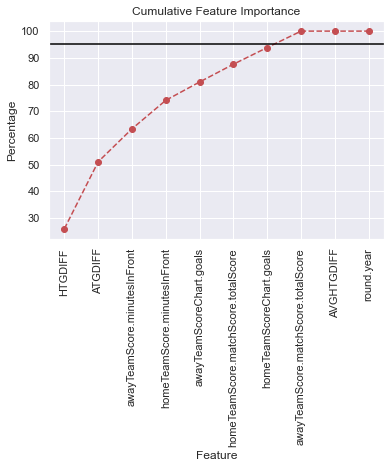

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

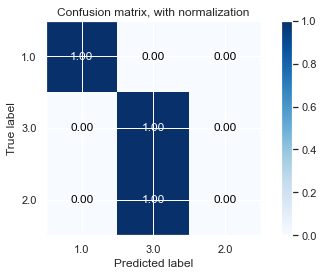

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 90.85%


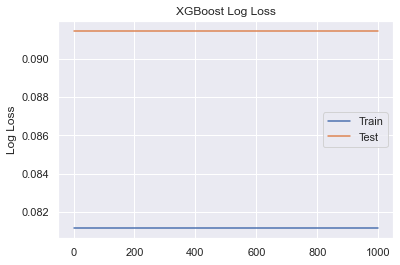

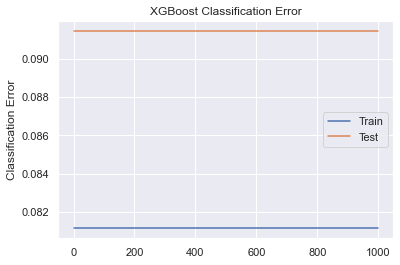

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
81,Carlton,Sydney Swans,1.0
82,Geelong Cats,Port Adelaide,3.0
83,Western Bulldogs,Gold Coast Suns,3.0
84,North Melbourne,Melbourne,1.0
85,Adelaide Crows,St Kilda,1.0
86,Richmond,Essendon,3.0
87,GWS Giants,West Coast Eagles,3.0
88,Hawthorn,Brisbane Lions,1.0
89,Fremantle,Collingwood,3.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]




In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
81,Carlton,Sydney Swans,1.0,0.580431,0.194196,0.225373
82,Geelong Cats,Port Adelaide,3.0,0.183043,0.170693,0.646265
83,Western Bulldogs,Gold Coast Suns,3.0,0.185771,0.172509,0.641721
84,North Melbourne,Melbourne,1.0,0.580431,0.194196,0.225373
85,Adelaide Crows,St Kilda,1.0,0.435841,0.206208,0.357952
86,Richmond,Essendon,3.0,0.183043,0.170693,0.646265
87,GWS Giants,West Coast Eagles,3.0,0.185771,0.172509,0.641721
88,Hawthorn,Brisbane Lions,1.0,0.435841,0.206208,0.357952
89,Fremantle,Collingwood,3.0,0.185771,0.172509,0.641721


In [27]:

xgb_df_next_games['home_prob_win'] = 0.0

for i in range(len(xgb_df_next_games)):
    if xgb_df_next_games['predicted_result'].values[i] == 3.0:
        xgb_df_next_games['home_prob_win'].values[i] = xgb_df_next_games['prob_win'].values[i]
    elif xgb_df_next_games['predicted_result'].values[i] == 2.0:
        xgb_df_next_games['home_prob_win'].values[i] = 0.5
    elif xgb_df_next_games['predicted_result'].values[i] == 1.0:
        xgb_df_next_games['home_prob_win'].values[i] = 1.0 - xgb_df_next_games['prob_loss'].values[i]

In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_prob_win
81,Carlton,Sydney Swans,1.0,0.580431,0.194196,0.225373,0.419569
82,Geelong Cats,Port Adelaide,3.0,0.183043,0.170693,0.646265,0.646265
83,Western Bulldogs,Gold Coast Suns,3.0,0.185771,0.172509,0.641721,0.641721
84,North Melbourne,Melbourne,1.0,0.580431,0.194196,0.225373,0.419569
85,Adelaide Crows,St Kilda,1.0,0.435841,0.206208,0.357952,0.564159
86,Richmond,Essendon,3.0,0.183043,0.170693,0.646265,0.646265
87,GWS Giants,West Coast Eagles,3.0,0.185771,0.172509,0.641721,0.641721
88,Hawthorn,Brisbane Lions,1.0,0.435841,0.206208,0.357952,0.564159
89,Fremantle,Collingwood,3.0,0.185771,0.172509,0.641721,0.641721
